<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 1</b></h3>
<h4><b>Bakery dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/bakery.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This data contains a sample of a French bakery sales data from years 2021 and 2022. The data for 2022 is not complete for the last part of the year. The data is also separated by the time of day the bakery product (article) was sold as well the name of the product.</p>
<p>If you want to inspect the data seaborn mostly uses, check the DataFrame called "values" in the code. Please note there is a helper column called "article-time_of_day", whose only purpose is to allow use to do some extra analysis with seaborn later.</p>

<p>Kaggle page: <a href="https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales">https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>There is one article (bakery product) that clearly stands out, and it also applies to a certain time of day. <br /><b>What is this article, and what could possibly be the reason for this?</b> (You might need Google and/or cultural knowledge to think about this question).</li>
<li>There is also another product that has increased in popularity more than others, what is this article? (you can also Google what it actually is if you're unfamiliar with it)</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too)</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>

<b>Extra questions/tasks for extra points:</b>
<li>If you find new insight or features in this dataset by using some other plots and/or pandas tricks, you can do so. In that case, please create a new section for the needed code cells you created accompanied with either code comments or markdown.  </li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>
<li>This notebook mostly concentrates on top 20% articles in the dataset. You can also inspect different regions of data, for example articles that are midrange in the dataset (quantile 20-50%). </li>


<hr />

<b style="color: red;">Place your answers here!</b>

#### There is one article (bakery product) that clearly stands out, and it also applies to a certain time of day <br>What is this article, and what could possibly be the reason for this?
In below, by using the groupby() function to find most common product in certain time a day and then sort them by time.
TRADITIONAL BAGUETTE is popular product in the Morning, it is typically served for breakfast. it makes that  BAGUETTE is came up from the sorting, I have many french friends all of them like that, the main reason why is used  more in the morning, because even in Finland and rest of others countries, people use more bread in the morning and in the morning bread is usually fresh and warm.


### There is also another product that has increased in popularity more than others, what is this article? (you can also Google what it actually is if you're unfamiliar with it)
By grouping the product and visualizations are already done, CROISSANT is the most popular product after the Baguette.  Croissants are popular in France because of  their buttery, flaky texture and convenience. making of that is quick.

### Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too)  Which are more useful in this case, correlations or plots? Or are they both useful?
#### Useful  Seaborn plots: 
1. Pairplot : There are three pairplots, I think the second one is more useful because it shows clearly that  which product  is sold over time.
the first pairplot without hue can not show more details and but third Pairplot With article-time_of_day as Hue shows overlapping points and it is hard to make a conclusion.
2. Regression Plot for TotalSales: sns.lmplot(x='month', y='TotalSales', data=values, hue='article') are  sns.lmplot(x='month', y='TotalSales', data=values, hue='time_of_day'), these two regression plots help us for understanding specific product sales across months and understanding specific period time. The Regression Plot for TotalSales and Regression Plot with Hue on Article + Time of Day are are not useful because Regression Plot for TotalSales shows basic insights and gression Plot with Hue on Article + Time of Day  is useful but visually overwhelming.
3. Boxplot:sns.boxplot(x='year', y='TotalSales', data=values, hue='article') and sns.boxplot(x='month', y='TotalSales', data=values, hue='article), these two boxplot are useful for comparing the products  yearly and showing which products's sales  in specific months. The rest of boxplots do not show useful insights and they have overlapping points. 
4. Seaborn plotting - heatmaps for correlation: All three heatmaps are not useful, they can not show any significant insights.
#### I droped these:
1. basic pair plot
2.  pair plot, hue on article + time of day -combination
3. heatmap for the whole dataset correlations
4. heatmap for fifth most popular article and its TotalSales
5. regression plot for TotalSales
6 regression plot for TotalSales, hue on article + time of day
7. box plot for TotalSales, hue on time of day
8. box plot for TotalSales, hue on time of day
9. box plot for TotalSales, hue on time of day
10. box plot for TotalSales, hue on article + time of day


### Which are more useful in this case, correlations or plots? Or are they both useful?
Plots are more useful than correlations in this case

<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [350]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Helper functions for dataset cleaning</b></h4>

In [351]:
# helper function for pandas, that allows changing the time
# column into nominal category (Morning, Afternoon, Evening)
def assign_day_time(row):
    # get the hour
    time = row['time'].split(":")
    hour = int(time[0])
    
    # due to common acknowledgments on what 
    # defines a Morning, Afternoon or Evening
    if 5 <= hour <= 12:
        return "Morning"
    elif 12 < hour <= 17:
        return "Afternoon"
    else:
        return "Evening"


<b>Extra questions/tasks for extra points:</b>

<b> My My code section starts here<b>

In [ ]:
# 

In [469]:
article = pd.read_csv("bakery_dataset.csv")
article.head(15)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
5,11,2021-01-02,09:25,150043.0,BAGUETTE,2.0,"0,90 €"
6,12,2021-01-02,09:25,150043.0,CROISSANT,3.0,"1,10 €"
7,15,2021-01-02,09:27,150044.0,BANETTE,1.0,"1,05 €"
8,18,2021-01-02,09:32,150045.0,TRADITIONAL BAGUETTE,3.0,"1,20 €"
9,19,2021-01-02,09:32,150045.0,CROISSANT,6.0,"1,10 €"


In [470]:

article['hour'] = pd.to_datetime(article['time'], format='%H:%M', errors='coerce').dt.hour

# I need to find the Total Sales, the code is already given
# "Unit price" is not a number, so I need to convert it, but the code is already given
article['unit_price'] = article['unit_price'].str.replace(",", ".")
article['unit_price'] = article['unit_price'].str.replace("€", "").astype(float)
# when I ran regression plot hour based Quantity, I saw that there are some outliers
# I will remove the negative values
article = article[article['Quantity'] > 0]
article['TotalPrice'] = article['unit_price'] * article['Quantity']
# there are many articles,  I pick the top 10 articles
top_product = article['article'].value_counts().head(6).index
new_data = article[article['article'].isin(top_product)]

new_data.head(15)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,hour,TotalPrice
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,8,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,8,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,9,2.40
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,9,6.00
5,11,2021-01-02,09:25,150043.0,BAGUETTE,2.0,0.90,9,1.80
6,12,2021-01-02,09:25,150043.0,CROISSANT,3.0,1.10,9,3.30
7,15,2021-01-02,09:27,150044.0,BANETTE,1.0,1.05,9,1.05
8,18,2021-01-02,09:32,150045.0,TRADITIONAL BAGUETTE,3.0,1.20,9,3.60
9,19,2021-01-02,09:32,150045.0,CROISSANT,6.0,1.10,9,6.60
10,22,2021-01-02,09:37,150046.0,PAIN AU CHOCOLAT,6.0,1.20,9,7.20


In [471]:
hourly_sales = new_data.groupby('hour')['Quantity'].sum()
hourly_sales

hour
7     10418.0
8     37914.0
9     41570.0
10    44028.0
11    45084.0
12    31070.0
13     4634.0
14      100.0
15       90.0
16     7425.0
17    10095.0
18     8541.0
19      934.0
20        6.0
Name: Quantity, dtype: float64

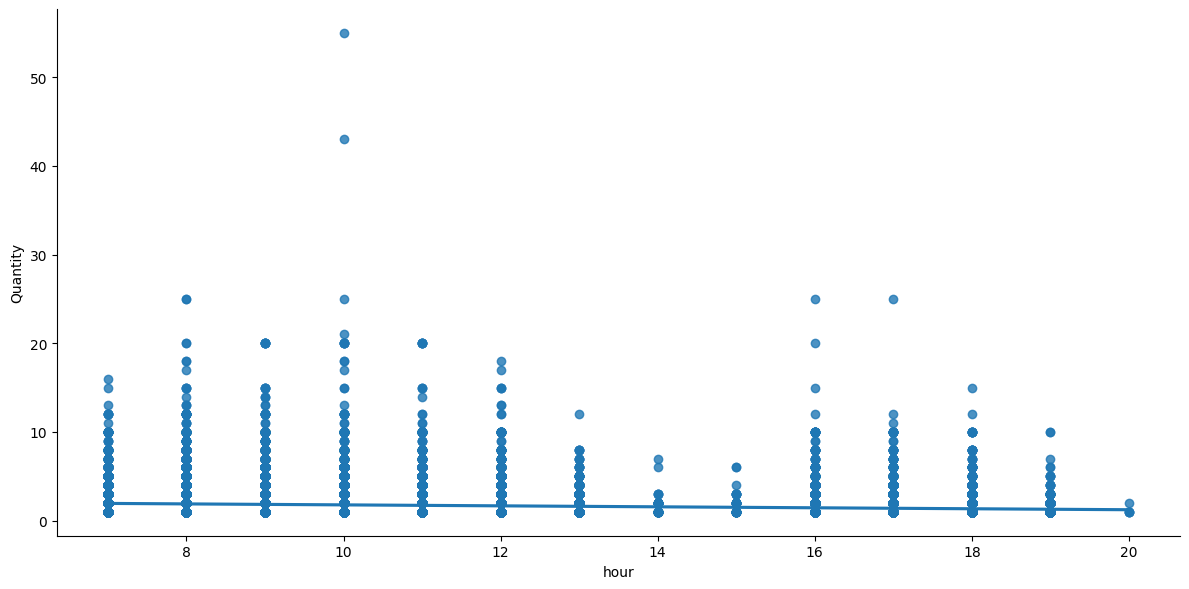

In [477]:
# regression plot
sns.lmplot(x='hour', y='Quantity', data=new_data, height=6, aspect=2)


In [476]:
hourly_sales = new_data.groupby(['hour', 'article'])['Quantity'].sum().reset_index()
hourly_sales

,hour,article,Quantity
0,7,BAGUETTE,803.0
1,7,BANETTE,685.0
2,7,COUPE,280.0
3,7,CROISSANT,3273.0
4,7,PAIN AU CHOCOLAT,2812.0
...,...,...,...
74,19,CROISSANT,28.0
75,19,PAIN AU CHOCOLAT,32.0
76,19,TRADITIONAL BAGUETTE,571.0
77,20,COUPE,1.0


##### Most of products are sold at 7-8 am

<h4><b>Load the dataset and clean up data</b></h4>

In [388]:
# load the dataset and remove first column (some old index column)
df = pd.read_csv("bakery_dataset.csv")
df.pop(df.columns[0])

# we can see that some of the articles (type of bakery product)
# are very rare, we can focus on the more popular alternatives
article_counts = df['article'].value_counts()

# let's see the most common articles
print("Most common articles:")
print(article_counts)

# let's cut off at 1500. if there are articles sold less than that -> leave it out 
df = df[df['article'].map(df['article'].value_counts()) > 1500]

# this is a very common operation, split the date-column so
# that we can have months and years separately (much more useful for analysis)
df['year'] = df['date'].str.slice(0, 4).astype(int)
df['month'] = df['date'].str.slice(5, 7).astype(int)
df = df.drop('date', axis=1)

# drop also the ticket number, it's a reference/id -type of column
# and therefore not useful for analysis purposes
# the only case when an id-column is useful in data analytics is when
# you want to combine multiple datasets into one dataset, and the only data
# that connects one data to another is the id (for example product has a category id, 
# but the actual category data is stored in another dataset)
df = df.drop('ticket_number', axis=1)

# the price of the article/product is usable, but we have to clean it a little bit
# first of all, change comma (,) to period (.) as decimal separator
# and remove the €-sign, and finally convert the column into float-format
df['unit_price'] = df['unit_price'].str.replace(",", ".")
df['unit_price'] = df['unit_price'].str.replace("€", "").astype(float)

# create new column, the time of day (see function above)
# remove original time column after that 
df["time_of_day"] = df.apply(assign_day_time, axis=1)
df = df.drop("time", axis=1)

# let's see how balanced the years are
# more or less balanced, ~113000 for year 2021 and ~90000 for year 2022 
year_items = df['year'].value_counts()
print("\nYear distribution:")
print(year_items)

Most common articles:
article
TRADITIONAL BAGUETTE      67689
COUPE                     20470
BAGUETTE                  15292
BANETTE                   15130
CROISSANT                 11508
                          ...  
PAIN NOIR                     1
REDUCTION SUCREES 24          1
PLAQUE TARTE 25P              1
TARTELETTE COCKTAIL           1
SACHET DE VIENNOISERIE        1
Name: count, Length: 149, dtype: int64

Year distribution:
year
2021    113687
2022     89085
Name: count, dtype: int64


In [389]:
# calculate total price based on quantity multiplied by price of single unit
# remove quantity and unit price columns after this
df['TotalPrice'] = df['Quantity'] * df['unit_price']
df = df.drop('Quantity', axis=1)
df = df.drop('unit_price', axis=1)

##################################################
## MORE ADVANCED PANDAS PREPARATION FOR SEABORN ##
##################################################

# even if we have reduced our articles to the cut off of 1500 pieces
# we still have quite too many article options in our data to do anything 

# one option is to use a feature called quantile with query
# quantile allows us to take a portion of the data based on the value distribution
# for example, top 10% or the values between 50-70% of the distribution.
# most commonly we are interested into highest values, mid-range values and lowest values

# first, take a copy of the dataframe, so we can preserve the original data
df_temp = df.copy()

# we need to drop the time of day so that we can find out the most common articles
df_temp = df_temp.drop('time_of_day', axis=1)

# group by articles and their total sums (quantity * units), and only take top 20% articles (quantile=0.8)
values = df_temp.groupby('article').sum().sort_values(by=['TotalPrice'], ascending=False)
df_highest = list(values.query('TotalPrice >= TotalPrice.quantile(q=0.80)').index)

# only filter the most common articles into a new dataframe
df_top = df[df['article'].isin(df_highest)]

# correlation matrices, one for all data and one for only top articles
correlations_original = df.corr(numeric_only=True)
correlations_top = df_top.corr(numeric_only=True)

# regroup data to article, time of day, year, month ... => grouped target value is TotalPrice
values = df_top.groupby(['article', 'time_of_day', 'year', 'month']).sum().sort_values(by=['TotalPrice'], ascending=False)
values = values.reset_index()

# new helper column with article name + time of day sold
# you'll notice later with seaborn why this is useful
# also rename the column so it doesn't confuse so much
values['article-time_of_day'] = values['article'] + "-" + values['time_of_day']
values = values.rename(columns={"TotalPrice": "TotalSales"})

## My code section for finding the answers

### There is one article (bakery product) that clearly stands out, and it also applies to a certain time of day <br> What is this article, and what could possibly be the reason for this?



In [336]:
# I need to copy the data
data = df.copy()
data.head()

,article,year,month,time_of_day,TotalPrice
0,BAGUETTE,2021,1,Morning,0.90
1,PAIN AU CHOCOLAT,2021,1,Morning,3.60
2,PAIN AU CHOCOLAT,2021,1,Morning,2.40
3,PAIN,2021,1,Morning,1.15
4,TRADITIONAL BAGUETTE,2021,1,Morning,6.00


In [390]:
values.head(10)  

,article,time_of_day,year,month,time,hour,TotalSales,article-time_of_day
0,TRADITIONAL BAGUETTE,Morning,2022,8,07:3307:3407:4507:5407:5707:5707:5908:0208:050...,58034,14331.20,TRADITIONAL BAGUETTE-Morning
1,TRADITIONAL BAGUETTE,Morning,2021,8,07:2107:2407:3607:4807:5908:0008:0108:0208:070...,52534,11906.40,TRADITIONAL BAGUETTE-Morning
2,TRADITIONAL BAGUETTE,Morning,2022,7,07:4908:0408:0908:1108:2508:2708:3608:3708:440...,48842,11451.70,TRADITIONAL BAGUETTE-Morning
3,TRADITIONAL BAGUETTE,Morning,2021,7,07:4207:4507:4608:0208:1008:1708:2608:4708:500...,41763,9309.60,TRADITIONAL BAGUETTE-Morning
4,TRADITIONAL BAGUETTE,Morning,2021,5,07:3707:4208:0208:0308:1408:1508:3408:4808:480...,31600,6957.60,TRADITIONAL BAGUETTE-Morning
5,TRADITIONAL BAGUETTE,Morning,2022,5,07:3607:3907:4207:4807:5007:5407:5508:1708:170...,28800,6066.25,TRADITIONAL BAGUETTE-Morning
6,TRADITIONAL BAGUETTE,Morning,2021,4,07:4808:1808:2808:4008:4108:4908:5508:5609:060...,27395,5571.60,TRADITIONAL BAGUETTE-Morning
7,TRADITIONAL BAGUETTE,Morning,2022,6,07:5808:0208:1908:2008:2308:2508:3608:4008:440...,26042,5198.70,TRADITIONAL BAGUETTE-Morning
8,TRADITIONAL BAGUETTE,Morning,2021,6,07:5007:5808:0108:1208:1308:1608:2708:5108:590...,25174,4941.60,TRADITIONAL BAGUETTE-Morning
9,TRADITIONAL BAGUETTE,Morning,2022,4,08:1408:4508:4808:5209:2809:3609:4409:5910:011...,24404,4925.00,TRADITIONAL BAGUETTE-Morning


In [338]:
# I need to group by article and time_of_day to find the most sold 
common_product = values.groupby(['article', 'time_of_day']).sum().sort_values(by=['TotalSales'], ascending=False)
common_product.reset_index()

,article,time_of_day,year,month,TotalSales,article-time_of_day
0,TRADITIONAL BAGUETTE,Morning,42450,123,120724.25,TRADITIONAL BAGUETTE-MorningTRADITIONAL BAGUET...
1,CROISSANT,Morning,42450,123,31812.60,CROISSANT-MorningCROISSANT-MorningCROISSANT-Mo...
2,FORMULE SANDWICH,Morning,42450,123,30567.00,FORMULE SANDWICH-MorningFORMULE SANDWICH-Morni...
3,PAIN AU CHOCOLAT,Morning,42450,123,29152.70,PAIN AU CHOCOLAT-MorningPAIN AU CHOCOLAT-Morni...
4,BANETTE,Morning,42450,123,21794.35,BANETTE-MorningBANETTE-MorningBANETTE-MorningB...
5,BAGUETTE,Morning,42450,123,18527.45,BAGUETTE-MorningBAGUETTE-MorningBAGUETTE-Morni...
6,TRADITIONAL BAGUETTE,Afternoon,42450,123,16584.50,TRADITIONAL BAGUETTE-AfternoonTRADITIONAL BAGU...
7,TRADITIONAL BAGUETTE,Evening,42450,123,7447.30,TRADITIONAL BAGUETTE-EveningTRADITIONAL BAGUET...
8,FORMULE SANDWICH,Afternoon,40428,114,4009.00,FORMULE SANDWICH-AfternoonFORMULE SANDWICH-Aft...
9,BANETTE,Afternoon,42450,123,1822.25,BANETTE-AfternoonBANETTE-AfternoonBANETTE-Afte...


In [339]:
total_sales_by_month = values.groupby(['article', 'year', 'month'])['TotalSales'].sum().sort_values(ascending=False)
total_sales_by_month.reset_index()

,article,year,month,TotalSales
0,TRADITIONAL BAGUETTE,2022,8,16378.70
1,TRADITIONAL BAGUETTE,2021,8,14053.20
2,TRADITIONAL BAGUETTE,2022,7,13023.40
3,TRADITIONAL BAGUETTE,2021,7,11083.20
4,TRADITIONAL BAGUETTE,2021,5,7766.40
...,...,...,...,...
121,BANETTE,2021,1,681.45
122,BAGUETTE,2021,12,679.50
123,BAGUETTE,2021,1,666.90
124,BANETTE,2022,1,584.85


In [340]:
total_sales_by_year = values.groupby('year')['TotalSales'].sum()
total_sales_by_year.reset_index()



,year,TotalSales
0,2021,157002.35
1,2022,132180.70


In [ ]:
df.head() 

,article,year,month,time_of_day,TotalPrice
0,BAGUETTE,2021,1,Morning,0.90
1,PAIN AU CHOCOLAT,2021,1,Morning,3.60
2,PAIN AU CHOCOLAT,2021,1,Morning,2.40
3,PAIN,2021,1,Morning,1.15
4,TRADITIONAL BAGUETTE,2021,1,Morning,6.00


<h4><b>seaborn plotting - pair plots</b></h4>

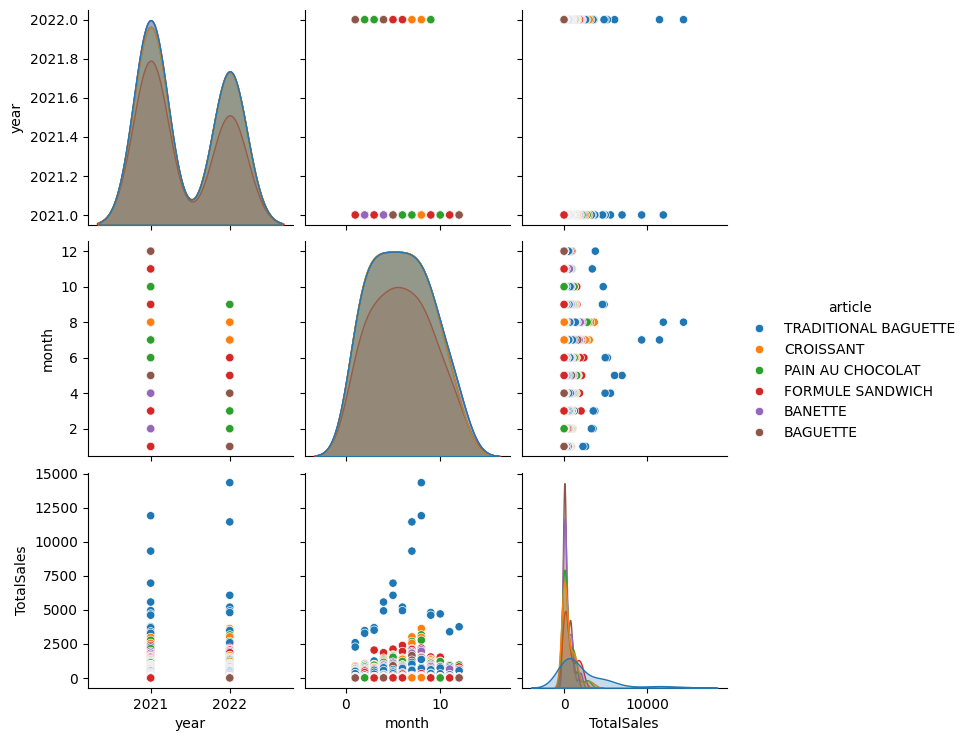

In [342]:
# pair plot, hue on article
sns.pairplot(values, hue="article")

<Axes: xlabel='year', ylabel='month'>

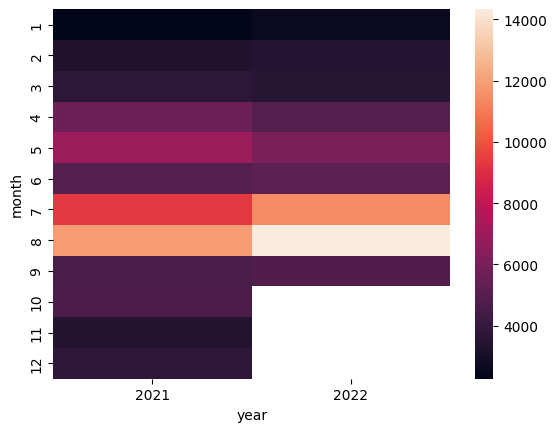

In [ ]:
# heatmap for most popular article and its TotalSales
df_snippet = values[values['article-time_of_day'] == "TRADITIONAL BAGUETTE-Morning"]
pt = df_snippet.pivot_table(index='month', columns='year', values='TotalSales')
sns.heatmap(pt)

<Axes: xlabel='year', ylabel='month'>

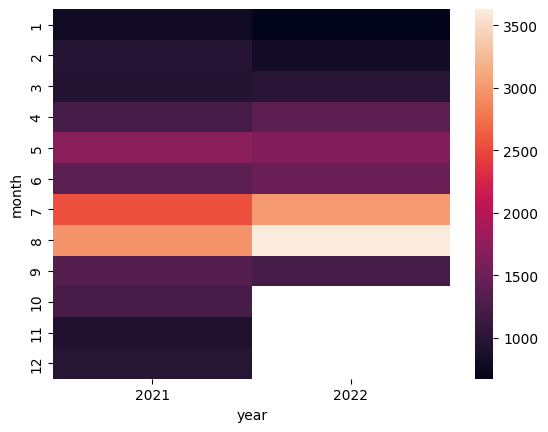

In [344]:
# heatmap for second most popular article and its TotalSales
df_snippet = values[values['article-time_of_day'] == "CROISSANT-Morning"]
pt = df_snippet.pivot_table(index='month', columns='year', values='TotalSales')
sns.heatmap(pt)

<h4><b>seaborn plotting - regression plots</b></h4>

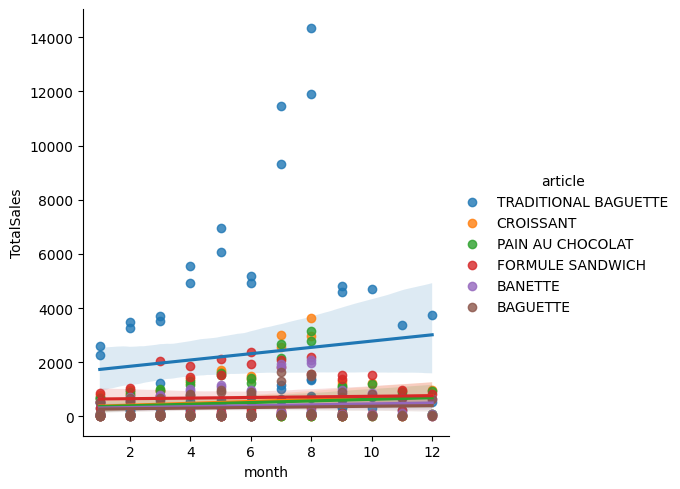

In [ ]:
# regression plot for TotalSales, hue on article
sns.lmplot(x='month', y='TotalSales', data=values, hue='article')

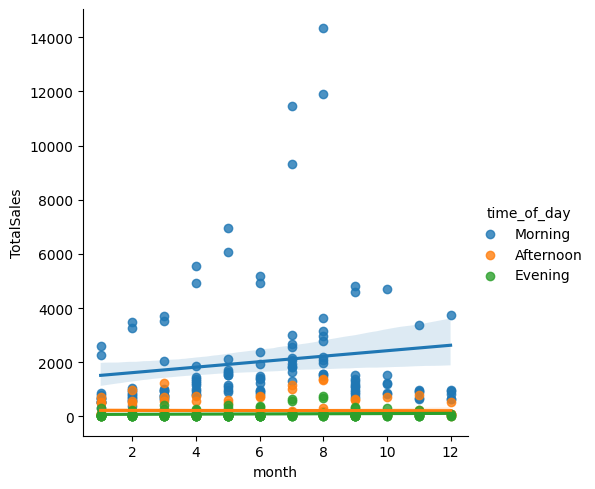

In [346]:
# regression plot for TotalSales, hue on time of day
sns.lmplot(x='month', y='TotalSales', data=values, hue='time_of_day')

<h4><b>seaborn plotting - box plots</b></h4>

<Axes: xlabel='year', ylabel='TotalSales'>

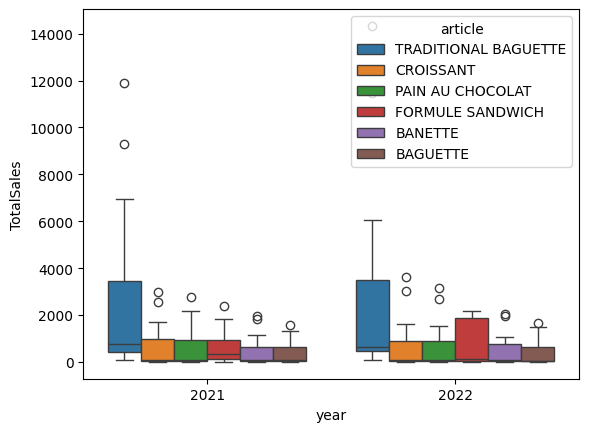

In [347]:
# box plot for TotalSales, hue on article
sns.boxplot(x='year', y='TotalSales', data=values, hue='article')

<Axes: xlabel='month', ylabel='TotalSales'>

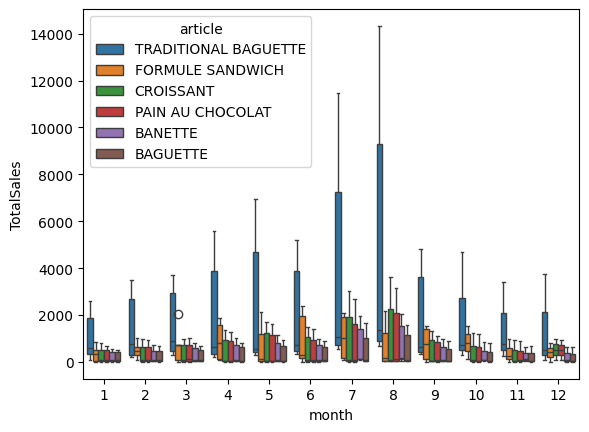

In [348]:
# box plot for TotalSales, hue on article
sns.boxplot(x='month', y='TotalSales', data=values, hue='article')